<a href="https://colab.research.google.com/github/luanans/Heart_Failure/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Módulo 2
Integrantes: Luana Nunes, Daiane Ribeiro de Souza, Sarah David Müzel e Paulo Muraro Ferreira

# Descrição  dos Dados

Esse trabalho é sobre o dataset: Heart Failure Prediction, disponivel no **kaggle** <a href="https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv"> </a>.

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo.
A insuficiência cardíaca é um evento comum causado por DCVs e este conjunto de dados contém 12 paraparâmetros sobre 299 pacientes que sofreram parada cardíaca. 

Todos os pacientes apresentavam histórico de disfunção sistólica ventricular esquerda. Sendo classificados nos grupos de risco 3 ou 4 de acordo com a classificação de estágio de falência cardíaca da New York Heart Association (NYHA). Os dados foram coletados durante o período de acompanhamento dos pacientes.

A maioria das doenças cardiovasculares pode ser prevenida abordando os fatores de risco comportamentais, como uso de tabaco, dieta não saudável e obesidade, sedentarismo e uso nocivo de álcool, usando estratégias para toda a população.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, em que um modelo de aprendizado de máquina pode ser de grande ajuda.

<br>

**Artigo original: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).**


# Conhecendo os Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
heart = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
heart

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


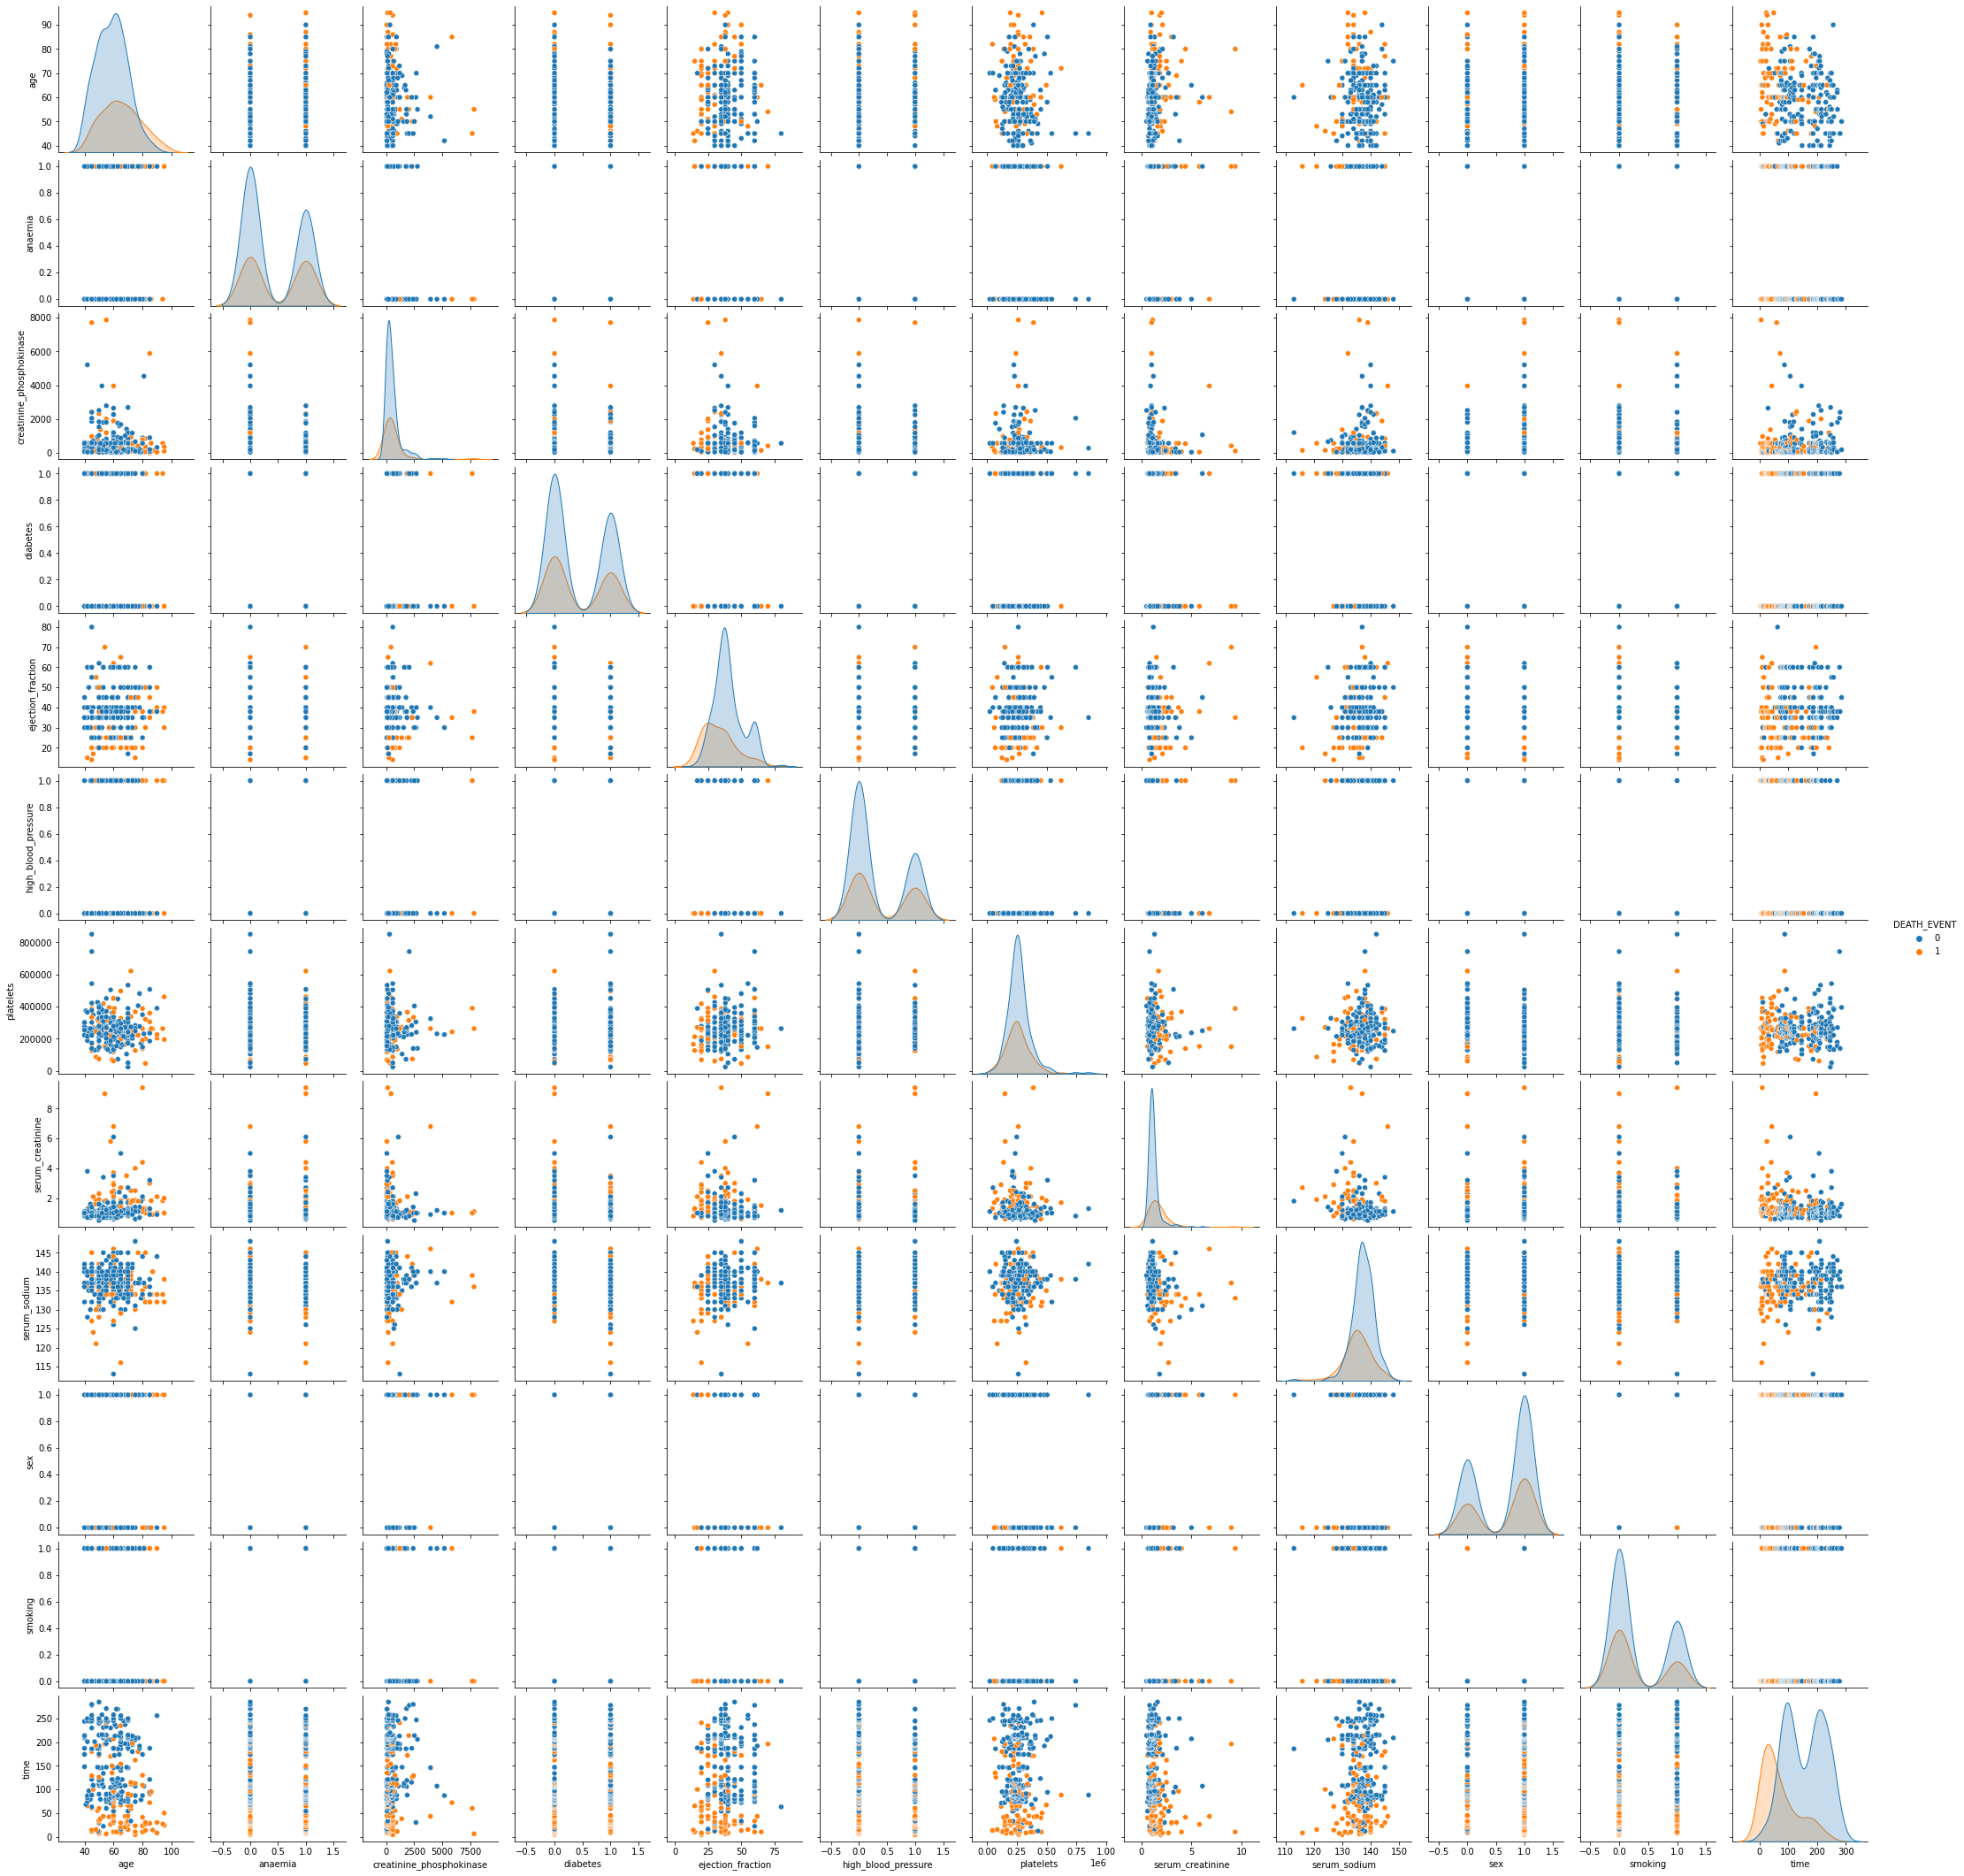

In [4]:
sns.pairplot(heart, hue='DEATH_EVENT');

Através de uma verificação dos dados, observa-se que:
- Não há presença de dados nulos
- Que ao todo, tem-se os dados de 299 pacientes que sofreram um infarto
- Foram analisados 12 fatores principais (variáveis de entrada).
- A variável resposta estudada é a morte dos pacientes que sofreram um infarto.

Os fatores análisados são:

- age: Idade dos pacientes 
- anaemia: Se os pacientes tem anemia
- creatinine_phosphokinase: Nível da enzima CPK no sangue (mcg/L)
- diabetes: Se o paciente tem diabetes
- ejection_fraction: Porcentagem de sangue saindo do coração a cada contração (porcentagem)  
- high_blood_pressure: Se o paciente tem pressão alta
- platelets: Plaquetas no sangue (quilo de plaquetas/mL)   
- serum_creatinine: Nível de creatinina sérica no sangue (mg/dL)
- serum_sodium: Nível de sódio sérico no sangue (mEq/L)       
- sex: Sexo dos pacientes   
- smoking: Se o paciente é fumante       
- time: Período de acompanhamento (dias)

A variável resposta análisada é:

- DEATH_EVENT: Se o paciente faleceu durante o período de acompanhamento



## Estatística descritiva

In [5]:
heart.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

Por meio da estatística descritiva, observa-se que os pacientes estudados tinham:
- Idade minima = 40 anos
- Idade Média = 60 anos 
- Idade máxima = 95 anos

Sendo que 75% do dataset consiste em pacientes com menos de 70 anos.

In [6]:
# Análisando a quantidade de mortes 
heart[['DEATH_EVENT']].sum()

DEATH_EVENT    96
dtype: int64

Analisando o dataset, verifica-se que dentre os 299 pacientes que sofreram infarto, 96 pacientes foram a óbito, o que representa aproximadamente 32% do total de pacientes.

# Análisando os óbitos ocorridos

Nesse estudo foram levantos 12 fatores  para compreender a relação dos infartos como hábitos (fumar), condições clinicas (pressão sanguínea, anemia, etc) e sexo, idade, dentre outros.

## Idade



In [7]:
# convertendo o tipo de dado da coluna age para inteiro
heart = heart.astype({"age": int})

Analisando a idades dos pacientes infartados

In [8]:
heart[['age']].value_counts()

age
60     35
50     27
65     26
70     25
45     19
55     17
75     11
53     10
58     10
63      8
80      7
72      7
40      7
42      7
85      6
52      5
68      5
62      5
51      4
49      4
59      4
61      4
73      4
90      3
82      3
46      3
69      3
64      3
67      2
77      2
57      2
48      2
66      2
78      2
95      2
44      2
54      2
43      1
41      1
81      1
47      1
86      1
87      1
56      1
94      1
79      1
dtype: int64

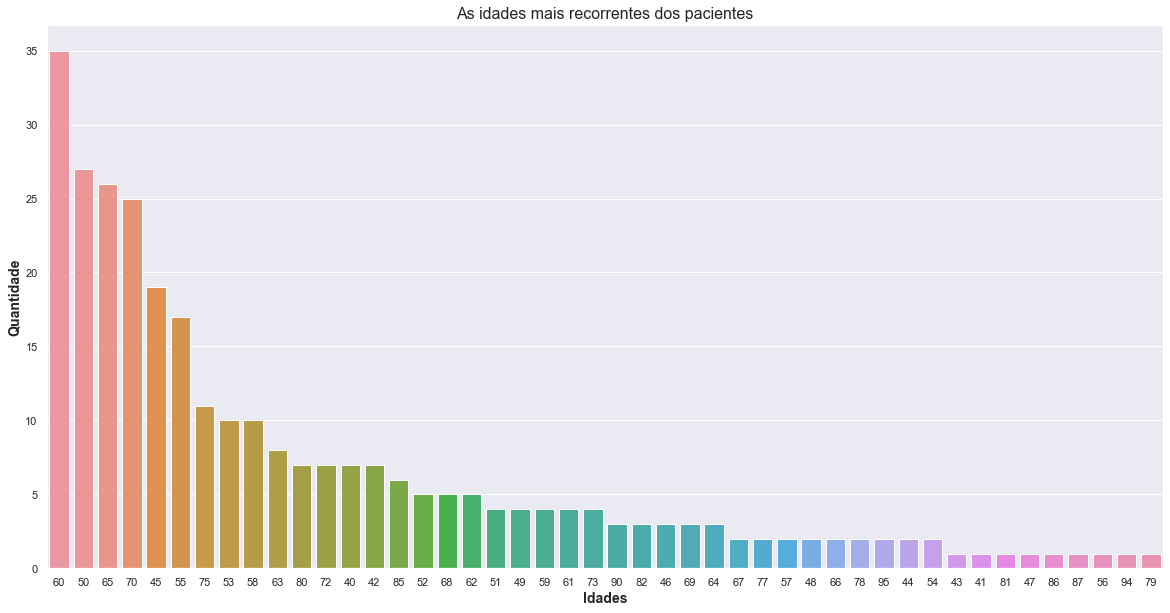

In [9]:
# crinado um gráfico para facilitar a vizualização das idades mais recorrentes

sns.set() # para trazer as configurações padrão do gráfico do seaborn que o colab não está importando
plt.figure(figsize= (20, 10)) # função do matplotlib que muda o tamanho da imagem
fig= sns.countplot(data=heart, x=heart['age'], order=heart['age'].value_counts().index) # criar gráfico

fig.set_title('As idades mais recorrentes dos pacientes', fontsize = 16)# nome do título

fig.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Idades', fontsize=14, fontweight = 'bold')

plt.show()

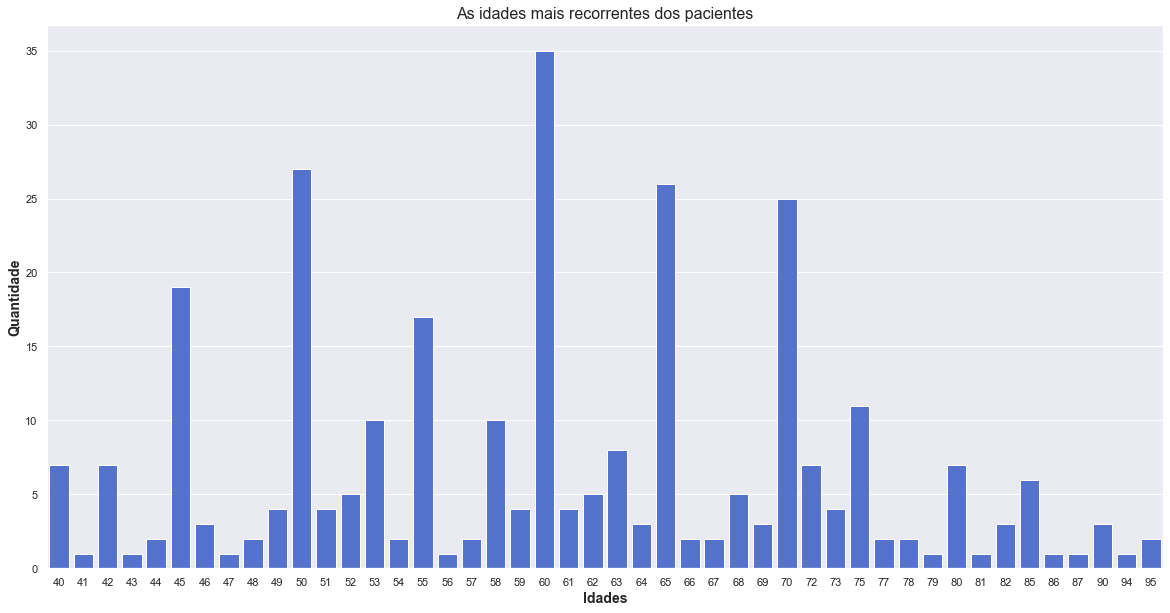

In [14]:
## segundo opção

sns.set() # para trazer as configurações padrão do gráfico do seaborn que o colab não está importando
plt.figure(figsize= (20, 10)) # função do matplotlib que muda o tamanho da imagem
fig= sns.countplot(data=heart, x=heart['age'], palette=['#4169E1']) # criar gráfico

fig.set_title('As idades mais recorrentes dos pacientes', fontsize = 16)# nome do título

fig.set_ylabel('Quantidade', fontsize=14, fontweight = 'bold')
fig.set_xlabel('Idades', fontsize=14, fontweight = 'bold')

plt.show()

In [ ]:
#fig_histograma = px.histogram(heart, x="age", nbins=200)
#fig_histograma.show() # para não mostrar as informações acima do gráfico

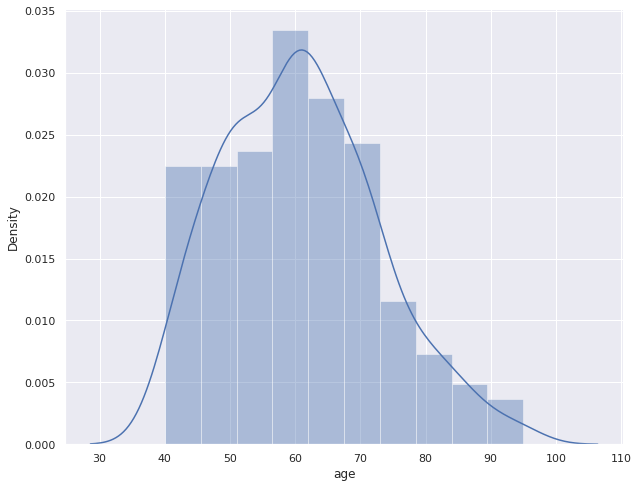

In [ ]:
#plt.figure (figsize= (10, 8))
#sns.distplot(heart['age']);

Para compreender melhor a distribuição das faixas etárias dentro do grupo de pacientes análisado, os dados foram dividios em 5 grupos de idade.

In [15]:
heart['grupos_idades'] = pd.qcut(heart.age, 5)
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT   grupos_idades  
0        0     4            1    (70.0, 95.0]  
1        0     6            1    (50.0, 58.0]  
2        1     7            1    (63.0, 70.0]  
3        0     7            1  (39.999, 50.0]  
4        0     8            1    (63.0, 70.0]

In [16]:
# verifiando os grupos criados e a quantidade de pacientes dentro de cada grupo
heart['grupos_idades'].value_counts()

(39.999, 50.0]    74
(63.0, 70.0]      66
(58.0, 63.0]      56
(70.0, 95.0]      52
(50.0, 58.0]      51
Name: grupos_idades, dtype: int64

In [17]:
# análisando a porcentagem de mortes dentro de cada grupo etário
morte_por_idade = heart.groupby(['grupos_idades'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(morte_por_idade*100).style.format('{0:,.1f}%')

É possivel observar, a maioria dos óbitos ocorreu no grupo entre 70 e 95 anos de idade.

## Fumantes

In [18]:
qtd_fumantes = heart['smoking'].sum() # determinar a quantidade de fumantes
qtd_nao_fumantes = (heart['smoking'] == 0).sum() # determinar a quantidade de não fumantes

fumantes_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==1)]) #  determinar a quantidade de fumantes que morrem
fumantes_nao_mortos = len(heart[(heart['smoking']==1) & (heart['DEATH_EVENT']==0)]) # determinar a quantidade de fumantes que não morrem

print(f'Quantidade de Fumantes: {qtd_fumantes} \nQuantidade de não-fumantes: {qtd_nao_fumantes}')
print(f'Quantidade de fumantes que faleceram: {fumantes_mortos} \nQuantidade fumantes que não faleceram: {fumantes_nao_mortos} ')


Quantidade de Fumantes: 96 
Quantidade de não-fumantes: 203
Quantidade de fumantes que faleceram: 30 
Quantidade fumantes que não faleceram: 66 


In [19]:
heart['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

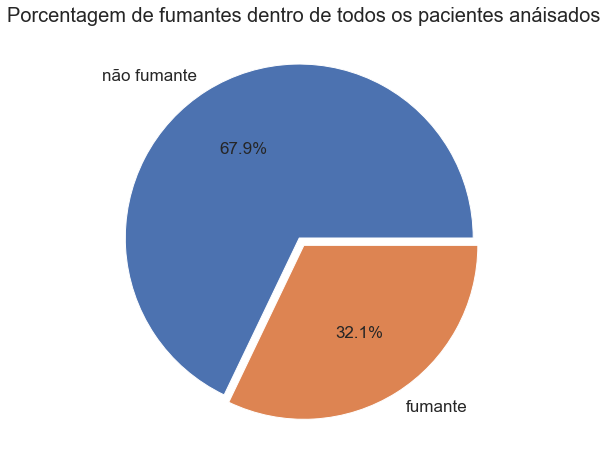

In [20]:
# Criando um gráfico de pizza para ver a distribuição dos dados

fig1 = heart['smoking'].value_counts()
plt.figure (figsize= (10, 8)) # função do matplotlib que muda o tamanho da imagem
labels = ['não fumante', 'fumante'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Porcentagem de fumantes dentro de todos os pacientes analisados', fontsize=20)  # titulo do gráfico
explode = [0.05, 0] # deixar uma parte em evidencia

# autopct -> mostra os valores em %
plt.pie(fig1, labels=labels, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

In [21]:
# probabilidade um fumante falecer 
fumante_morre = fumantes_mortos/qtd_fumantes*100
fumante_morre

31.25

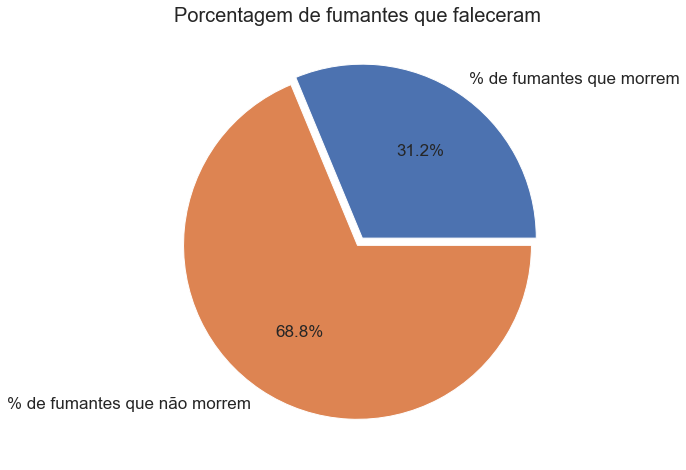

In [22]:
fig1 = [fumantes_mortos, fumantes_nao_mortos]
plt.figure (figsize= (10, 8)) # função do matplotlib que muda o tamanho da imagem
labels = ['% de fumantes que morrem', '% de fumantes que não morrem'] # colocar o nome em cada fatia
plt.axis ('equal') # para o gráfico sair circular e não oval
plt.title ('Porcentagem de fumantes que faleceram', fontsize=20)  # titulo do gráfico
explode = [0.05, 0] # deixar uma parte em evidencia

# autopct -> mostra os valores em %
plt.pie(fig1, labels=labels, explode = explode, textprops={'fontsize': 17},autopct='%1.1f%%')
plt.show()

In [41]:
qtd_fumantes = heart['smoking'].sum()
qtd_nao_fumantes = (heart['smoking'] == 0).sum()

fumam = heart.groupby(['smoking'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_fumantes if heart['smoking'].iloc[x.index[0]]==0 else x.sum()/qtd_fumantes)
fumam['smoking'] = heart['smoking']
fumantes = fumam.groupby(['smoking']).apply(lambda x: x.mean()).drop(['smoking'], axis =1)
fum1 = (fumantes*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se fuma (smoking=1) e se não fuma (smoking=0)")
fum1

In [24]:
# Gráfico de pizza, da distribuição dos alunos por currículo em % e para retira currículos que não existem

s_full_curriculum = df_last_classes["full_student_curriculum"].value_counts()

curriculums = ["BEG-v1", "INT-v1", "ADV-v1", "ADV-v2", "PRO-v1", "PRO-v2"]
lst_full_curriculum = list()

for curriculum in curriculums:
    lst_full_curriculum.append(s_full_curriculum[curriculum])

s_full_curriculum = pd.Series(data=lst_full_curriculum, index=curriculums)

fig = go.Figure(
    data=[
        go.Pie(
            labels=s_full_curriculum.index,
            values=s_full_curriculum.values,
            hoverinfo="label+value",
            textinfo="percent",
            sort=False,
        )
    ]
)

fig.update_layout(
    title={"text": "Students per Curriculum"},  
    legend={"title": "Curriculum"}, 
    height=600,
    width = 600
)

fig.show()

NameError: name 'df_last_classes' is not defined

In [25]:
dados = ["qtd_fumantes", "qtd_nao_fumantes ", "fumantes_mortos", "fumantes_nao_mortos"]

In [26]:

fig = px.pie(heart, values='smoking', )
fig.show()


## Pressão alta



In [27]:
heart[['high_blood_pressure']].sum()

high_blood_pressure    105
dtype: int64

In [28]:
heart[['high_blood_pressure']].sum()/len(heart)

high_blood_pressure    0.351171
dtype: float64

Hipertensos que morreram.

In [29]:
table2 = heart.groupby(['high_blood_pressure'])[['DEATH_EVENT']].apply(lambda x: x.sum()/105)
(table2*100).style.format('{0:,.1f}%')

Falecidos que tinham pressão alta.

In [30]:
table2 = heart.groupby(['DEATH_EVENT'])[['high_blood_pressure']].apply(lambda x: x.sum()/105)
(table2*100).style.format('{0:,.1f}%')

In [31]:
qtd_pressao = heart['high_blood_pressure'].sum()
qtd_nao_pressao = (heart['high_blood_pressure'] == 0).sum()
pressao_mortos = len(heart[(heart['high_blood_pressure']==1) & (heart['DEATH_EVENT']==1)])
nao_pressao_mortos = len(heart[(heart['high_blood_pressure']==0) & (heart['DEATH_EVENT']==1)])

In [38]:
probabilidade_morrer_se_nao_pressao = 100*nao_pressao_mortos/qtd_nao_pressao
print(f'Probabilidade de morrer se o paciente não é hipertenso: {probabilidade_morrer_se_nao_pressao:.2f}%')

Probabilidade de morrer se o paciente não é hipertenso: 29.38%


In [39]:
probabilidade_morrer_se_pressao = 100*pressao_mortos/qtd_pressao
print(f'Probabilidade de morrer se o paciente é hipertenso: {probabilidade_morrer_se_pressao:.2f}%')

Probabilidade de morrer se o paciente é hipertenso: 37.14%


In [40]:
qtd_hipertensos = heart['high_blood_pressure'].sum()
qtd_nao_hipertensos = (heart['high_blood_pressure'] == 0).sum()

pressao = heart.groupby(['high_blood_pressure'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_hipertensos if heart['high_blood_pressure'].iloc[x.index[0]]==0 else x.sum()/qtd_hipertensos)
pressao['high_blood_pressure'] = heart['high_blood_pressure']
pressao1 = pressao.groupby(['high_blood_pressure']).apply(lambda x: x.mean()).drop(['high_blood_pressure'], axis =1)
press = (pressao1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se é hipertenso(=1) e se não é hipertenso (=0)")
press

## Diabetes

Porcentagem dos falecidos que era diabéticos.

In [ ]:
table2 = heart.groupby(['diabetes'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(table2*100).style.format('{0:,.1f}%')

Porcentagem dos diabéticos que morreram.

In [ ]:
table2 = heart.groupby(['DEATH_EVENT'])[['diabetes']].apply(lambda x: x.sum()/heart[['diabetes']].sum())
(table2*100).style.format('{0:,.1f}%')

In [ ]:
qtd_diabeticos = heart['diabetes'].sum()
qtd_nao_diabeticos = (heart['diabetes'] == 0).sum()
diabeticos_mortos = len(heart[(heart['diabetes']==1) & (heart['DEATH_EVENT']==1)])
nao_diabeticos_mortos = len(heart[(heart['diabetes']==0) & (heart['DEATH_EVENT']==1)])

In [ ]:
probabilidade_morrer_se_diabetico = 100*diabeticos_mortos/qtd_diabeticos
probabilidade_morrer_se_diabetico

32.0

In [ ]:
probabilidade_morrer_se_nao_diabetico = 100*nao_diabeticos_mortos/qtd_nao_diabeticos
probabilidade_morrer_se_nao_diabetico

32.18390804597701

In [ ]:
qtd_diabeticos = heart['diabetes'].sum()
qtd_nao_diabeticos = (heart['diabetes'] == 0).sum()

diabetes = heart.groupby(['diabetes'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_nao_diabeticos if heart['diabetes'].iloc[x.index[0]]==0 else x.sum()/qtd_diabeticos)
diabetes['diabetes'] = heart['diabetes']
diabetes1= diabetes.groupby(['diabetes']).apply(lambda x: x.mean()).drop(['diabetes'], axis =1)
(diabetes1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se é diabético (=1) e se não é diabético (=0)")

## Sexo

In [ ]:
table2 = heart.groupby(['sex'])[['DEATH_EVENT']].apply(lambda x: x.sum()/heart[['DEATH_EVENT']].sum())
(table2*100).style.format('{0:,.1f}%')

In [ ]:
qtd_male = heart['sex'].sum()
qtd_female = (heart['sex'] == 0).sum()

sexo = heart.groupby(['sex'])[['DEATH_EVENT']].transform(lambda x: x.sum()/qtd_female if heart['sex'].iloc[x.index[0]]==0 else x.sum()/qtd_male)
sexo['sex'] = heart['sex']
sexo1= sexo.groupby(['sex']).apply(lambda x: x.mean()).drop(['sex'], axis =1)
(sexo1*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer se male (=1) e se é female (=0)")

**Em resumo**

Probabilidade de falececer se fuma = 32,5%

Probabilidade de falecer se não fuma = 32,5%

Probabilidade de falecer se é hipertenso = 37,1%

Probabilidade de falecer se não é hipertenso = 29,4%

Probabilidade de falecer se tem diabetes = 32%

Probabilidade de falecer se não tem diabetes = 32,2%

Probabilidade de falecer se male = 32%

Probabilidade de falecer se female = 32.4%


In [ ]:
data = {}
pd.DataFrame.from_dict(data)
data['Fumantes'] = fumantes['DEATH_EVENT']
data['Pressão Alta'] = pressao1['DEATH_EVENT']
data['Diabetes'] = diabetes1['DEATH_EVENT']
data['Sexo'] = sexo1['DEATH_EVENT']
(pd.DataFrame(data)*100).style.format('{0:,.1f}%').set_caption("Probabilidade de falecer")


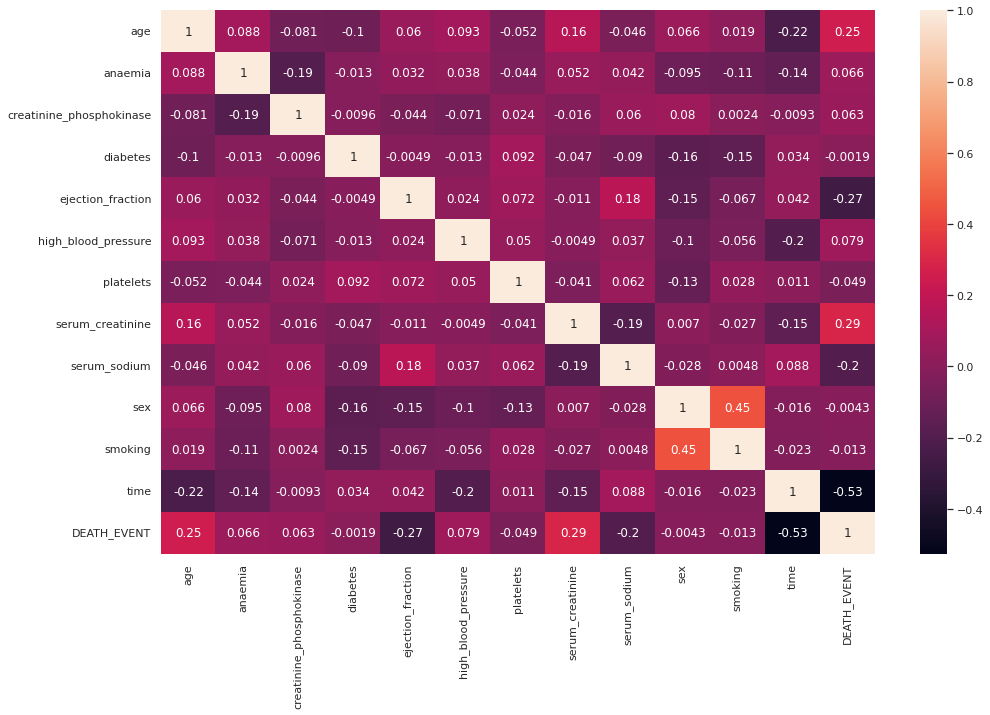

In [ ]:
# para facilitar a visualização dessa correlação podemos criar um gráfico usando o método heatmap seaborn
# no quai vai aparacer o valor de cada um das correlações dentro dos quadrados.

# 1- gerando a correlação
correlação = heart.corr()

#2- Gerando mapa heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data=correlação, annot=True)

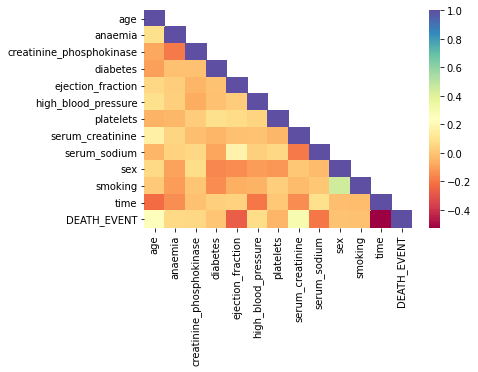

In [3]:
corr_df = heart.corr()


df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
df_lt

hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)

# análisando as acusa conjuntas 

multiplos fatores

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure',"grupos_idades"])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart['DEATH_EVENT']))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['high_blood_pressure', 'smoking',"grupos_idades", ])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

In [ ]:
table2 = heart.groupby(['serum_sodium','high_blood_pressure',"grupos_idades", ])[['DEATH_EVENT']].apply(lambda x: x.sum()/len(heart))
(table2*100).style.format('{0:,.1f}%')

Os valores de referência da CPK são entre 30.00 U/L e 200.00 U/L para homens e entre 29.00 U/L e 168.00 U/L para mulheres. Resultados fora dessa faixa devem ser acompanhados por um médico. Valores baixos podem ocorrer em pessoas com baixa massa muscular, desnutridas e idosos.
CPK é a sigla para a creatinofosfoquinase, uma enzima do corpo humano que está presente nos músculos e em outros lugares do corpo, como o cérebro, o pulmão ou o coração. Quando elevada, essa enzima pode ser um marcador de infarto do miocárdio, miocardite, hipertermia e distrofia muscular.

In [ ]:
# probabilidade de um fumante não falecer
nao_fumantes_mortos = len(heart[(heart['smoking']==0) & (heart['DEATH_EVENT']==1)]) # determinar a quantidade de não fumantes que morrem
print(f'Quantidade de não fumantes mortos: {nao_fumantes_mortos}')

fumante_nao_morre =nao_fumantes_mortos/qtd_nao_fumantes*100
fumante_nao_morre

In [ ]:
def prob(y):
  z = y + ['DEATH_EVENT']
  return heart.groupby(z).apply(lambda x: len(x)).reset_index().iloc[-1:,-1].values[0]/heart.groupby(y).apply(lambda x: len(x)).reset_index().iloc[-1:,-1].values[0]

prob(['diabetes'])

# Gráfico interativo

In [4]:
df2 = pd.get_dummies(heart, columns=['sex']).rename(columns={"sex_1": "male", "sex_0": "female"})

df3 = pd.get_dummies(pd.cut(df2.age, [40,50,60,70,95]))

df2["grupo_1"] = df3.iloc[:,0]
df2["grupo_2"] = df3.iloc[:,1]
df2["grupo_3"] = df3.iloc[:,2]
df2["grupo_4"] = df3.iloc[:,3]

df = df2[['DEATH_EVENT', 'male','female','smoking','anaemia', 'diabetes', 'high_blood_pressure','grupo_1','grupo_2','grupo_3','grupo_4']]

In [5]:
cond = ['DEATH_EVENT', 'male','female','smoking','anaemia', 
        'diabetes', 'high_blood_pressure','grupo_1','grupo_2','grupo_3','grupo_4']

def prob11(q):
    lista = []
    num = []
    for i in range(11):
        num.append(q[i])
    
    if not any(num[1:]):
        return 0
    else: 
        for i in range(11):
            if q[i]:
                lista.append(cond[i])
        return lista


def texto_query(q):
    if not any(q[1:]):
        return False
    else: 
        lista9 = prob11(q).copy()
        for i in ['DEATH_EVENT']:
            if i in lista9:
                lista9.remove(i)
        if not lista9:
            return False

        else:
            if 'male' in lista9 and 'female' in lista9:
                if len(lista9)==2:
                    return False
                else:
                    lista9.remove('male')
                    lista9.remove('female')
            
            st = st1 = ''
            
            if lista9[0] not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                st = lista9[0] + '==1'
                for i in lista9[1:]:
                    if i not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                        st = st + ' & ' + i + '==1'
     
            if sum(q[-4::]) >=1:
                grupos = list(set(prob11(q)).intersection(set(['grupo_1','grupo_2','grupo_3','grupo_4'])))
                #st = st + ' & ('
                st1 = '(' + grupos[0] + '==1'
                for i in grupos[1:]:
                    st1 = st1 + ' | ' + i + '==1' 
                st1 = st1 + ')'
            
            if st!='' and st1!='':
                return st + ' & ' + st1 
            elif st!='' and st1=='':
                return st
            elif st=='' and st1!='':
                return st1

def texto_query_morte(q):
    if not any(q[1:]):
        return False
    else: 
        lista9 = prob11(q).copy()
        for i in []:
            if i in lista9:
                lista9.remove(i)
        if not lista9:
            return False

        else:
            if 'male' in lista9 and 'female' in lista9:
                if len(lista9)==2:
                    return False
                else:
                    lista9.remove('male')
                    lista9.remove('female')
            
            st = st1 = ''
            
            if lista9[0] not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                st = lista9[0] + '==1'
                for i in lista9[1:]:
                    if i not in ['grupo_1','grupo_2','grupo_3','grupo_4']:
                        st = st + ' & ' + i + '==1'
     
            if sum(q[-4::]) >=1:
                grupos = list(set(prob11(q)).intersection(set(['grupo_1','grupo_2','grupo_3','grupo_4'])))
                #st = st + ' & ('
                st1 = '(' + grupos[0] + '==1'
                for i in grupos[1:]:
                    st1 = st1 + ' | ' + i + '==1' 
                st1 = st1 + ')'
            
            if st!='' and st1!='':
                return st + ' & ' + st1 
            elif st!='' and st1=='':
                return st
            elif st=='' and st1!='':
                return st1
            
            
            
def prob1(q):
    if not texto_query(q):
        return 100
    else:
        return 100*len(df.query(texto_query(q)))/len(heart)

def prob2(q):        
    if not texto_query(q):
        return 100*len(df.query('DEATH_EVENT==1'))/len(heart)
    else:
        return 100*len(df.query(texto_query_morte(q)))/len(heart)

def qtd_pacientes(q):   
    if not texto_query(q):
        return len(heart)
    else:
        return len(df.query(texto_query(q)))

def qtd_mortos(q):   
    if not texto_query(q):
        return len(df.query('DEATH_EVENT==1'))
    else:
        return len(df.query(texto_query_morte(q)))


def prob_morrer(q):       
    if not texto_query(q):
        return 100*len(df.query('DEATH_EVENT==1'))/len(heart)
    else:
        return 100*len(df.query(texto_query_morte(q)))/len(df.query(texto_query(q)))

        

<IPython.core.display.Javascript object>


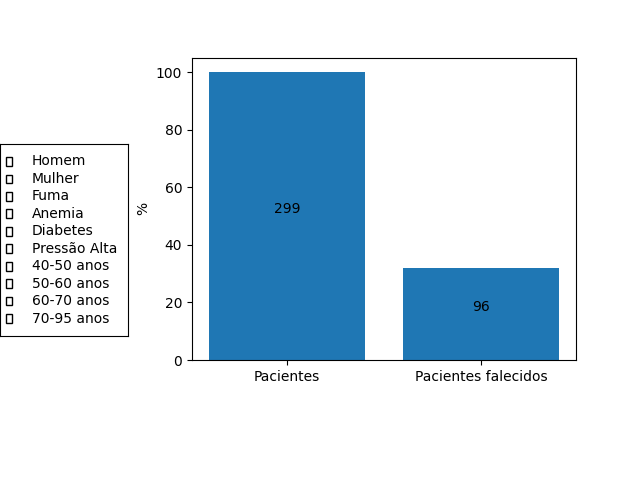

In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, RadioButtons, CheckButtons

q = [True, False, False ,False, False, False, False, False, False, False, False]
x = ['Pacientes', 'Pacientes falecidos']
y = [prob1(q), prob2(q)]

fig = plt.figure()
ax = fig.subplots()
plt.subplots_adjust(left = 0.3, bottom = 0.25)
p1, p2 = ax.bar(x, y, label = 'Plot 1')
#plt.ylim((0,100))
ax.set_ylabel('%')

plots =[p1, p2]
activated = [False, False ,False, False, False, False, False, False, False, False] #define quais botões começam ativados
labels = ['Homem','Mulher','Fuma','Anemia','Diabetes','Pressão Alta','40-50 anos','50-60 anos','60-70 anos',
          '70-95 anos']

ax_check = plt.axes([0, 0.3, 0.2, 0.4])
plot_button = CheckButtons(ax_check,labels, activated)

texto = ax.text(.5, 50,'', fontsize=10)

height1 = p1.get_height()
alt1 = ax.text(p1.get_x() + p1.get_width() / 2.0, height1/2, f'{round(qtd_pacientes(q),2)}', ha='center', va='bottom')

height2 = p2.get_height()
alt2 = ax.text(p2.get_x() + p2.get_width() / 2.0, height2/2, f'{round(qtd_mortos(q),2)}', ha='center', va='bottom')

def select_plot(label):
    
    index = labels.index(label)
    q[index+1] = not q[index+1]
    y = [prob1(q), prob2(q)]
    p1.set_height(y[0])
    p2.set_height(y[1])
    texto.set_text(f'Probabilidade de morrer \n {round(prob_morrer(q),2)}%')
       
    alt1.set_position((0,p1.get_height()/2))
    alt2.set_position((1,p2.get_height()/2))
    
    alt1.set_text(f'{round(qtd_pacientes(q),2)}')
    alt2.set_text(f'{round(qtd_mortos(q),2)}')
    
    plt.draw() 

plot_button.on_clicked(select_plot)
plt.show()